In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# data from https://www.csc.kth.se/cvap/actions/
%cd drive
import tensorflow as tf
print(tf.__version__)


Mounted at /content/drive
/content/drive
2.18.0


In [ ]:
%cd /content/drive/MyDrive/'Research Idea 4 (Deep Learning Classification)'/'Group 1 : Video Activity Recognition (Arthur,Josh)'/'Organized Data'/'Good Sections'
!ls

/content/drive/.shortcut-targets-by-id/1Wazg-sc1r3KWk6T95pnbHeH8eMssRnr8/Research Idea 4 (Deep Learning Classification)/Group 1 : Video Activity Recognition (Arthur,Josh)/Organized Data/Good Sections
 entry
 entry_exit_lstm.ipynb
 entry_seg
 exit
 exit_seg
 fullymodified_data_model_84_EarlyStopping.h5
 fullymodified_data_model_84_EarlyStopping.keras
 fullymodified_data_model_84.h5
 fullymodified_data_model_84.keras
 HELLO.mp4
 history.npy
 keras_tuner_model.h5
 keras_tuner_model.keras
 kt_dir
 model_plot.png
'VID_20230207_090940_Back to Front Roll Over.mp4'
 VID_20230207_090940_Freestyle.mp4
'VID_20230207_090940_Front to Back Roll Over.mp4'
'VID_20230207_090940_Holding On Wall In Water.mp4'
'VID_20230207_090940_Instructor Interaction.mp4'
'VID_20230207_090940_Kicking Off Wall.mp4'
'VID_20230207_090940_Kick While Floating On Back.mp4'
 VID_20230207_090940_Sitting.mp4
 VID_20230207_090940_Standing.mp4
'VID_20230207_173702_Kicking While Floating On Front.mp4'
'VID_20230207_173702_Kick Whi

In [ ]:
import pandas as pd
entry_data = pd.read_csv("entry_seg/entry_data.csv")
exit_data = pd.read_csv("exit_seg/exit_data.csv")
exit_data.head()
if "actvity" in entry_data.columns:
  entry_data = entry_data.drop(columns=["actvity"])
if "actvity" in exit_data.columns:
  exit_data = exit_data.drop(columns=["actvity"])
entry_data["target_points"] = entry_data["target_points"].apply(eval)
exit_data["target_points"] = exit_data["target_points"].apply(eval)
entry_data.head()

data = pd.concat([entry_data, exit_data], ignore_index=True)
# shuffle the data
data = data.sample(frac=1).reset_index(drop=True)
data.head()




,target_points,videofile,activity
0,"[[(0, 0), (440, 541), (422, 542), (458, 529), ...","VID_20230215_174819_Exit_(446, 538)_exit_117_1...",exit
1,"[[(455, 487), (466, 479), (443, 477), (478, 48...","VID_20230215_154646_Exit_(442, 528)_exit_93_14...",exit
2,"[[(0, 0), (0, 0), (0, 0), (0, 0), (544, 129), ...","VID_20230210_103843_Entry_(549, 158)_entry_42_...",entry
3,"[[(563, 609), (565, 590), (545, 598), (0, 0), ...","VID_20230213_091230_Exit_(481, 657)_exit_36_83...",exit
4,"[[(0, 0), (0, 0), (0, 0), (691, 206), (740, 20...",VID_20230208_192003_Jump Entry and Recovery_(7...,entry


In [ ]:
data.head()

,target_points,videofile,activity
0,"[[(0, 0), (440, 541), (422, 542), (458, 529), ...","VID_20230215_174819_Exit_(446, 538)_exit_117_1...",exit
1,"[[(455, 487), (466, 479), (443, 477), (478, 48...","VID_20230215_154646_Exit_(442, 528)_exit_93_14...",exit
2,"[[(0, 0), (0, 0), (0, 0), (0, 0), (544, 129), ...","VID_20230210_103843_Entry_(549, 158)_entry_42_...",entry
3,"[[(563, 609), (565, 590), (545, 598), (0, 0), ...","VID_20230213_091230_Exit_(481, 657)_exit_36_83...",exit
4,"[[(0, 0), (0, 0), (0, 0), (691, 206), (740, 20...",VID_20230208_192003_Jump Entry and Recovery_(7...,entry


In [ ]:
## get the first row of data
data.iloc[0]

,0
target_points,"[[(0, 0), (440, 541), (422, 542), (458, 529), ..."
videofile,"VID_20230215_174819_Exit_(446, 538)_exit_117_1..."
activity,exit


In [ ]:
import cv2
import numpy as np

# Assuming 'data' is already loaded and contains your points.
# Here, frames_points is taken from data['target_points'][0]
frames_points = data.iloc[0]['target_points']

# New (bigger) video parameters
# We double the original resolution from 640x480 to 1280x960.
frame_width, frame_height = 1280, 960
fps = 10

# Create a VideoWriter object using the mp4v codec.
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_filename = "HELLO.mp4"
video_out = cv2.VideoWriter(video_filename, fourcc, fps, (frame_width, frame_height))

# Calculate scaling factors to adjust point coordinates
scale_x = frame_width / 640    # if original points assume width of 640
scale_y = frame_height / 480   # if original points assume height of 480

# Loop through each frame, draw the points, and write the frame to the video.
for frame_points in frames_points:
    # Create a black canvas with the new dimensions.
    frame = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)

    # Optionally, print the frame points for debugging.
    print(frame_points)

    # Draw each nonzero point after scaling its coordinates.
    for point in frame_points:
        if point != (0, 0):  # Skip if (0,0) indicates no point.
            # Scale the point coordinates.
            scaled_point = (int(point[0] * scale_x), int(point[1] * scale_y))
            cv2.circle(frame, scaled_point, radius=3, color=(0, 255, 0), thickness=-1)

    video_out.write(frame)

# Release the VideoWriter to ensure the video is properly saved.
video_out.release()

print(f"Video saved to HE=")


[(0, 0), (440, 541), (422, 542), (458, 529), (0, 0), (493, 526), (388, 533), (543, 526), (352, 545), (532, 578), (379, 584), (486, 528), (420, 531), (0, 0), (0, 0), (0, 0), (0, 0)]
[(444, 561), (454, 552), (433, 551), (471, 536), (418, 535), (502, 537), (396, 523), (531, 575), (347, 532), (517, 595), (356, 577), (492, 544), (423, 538), (0, 0), (0, 0), (0, 0), (0, 0)]
[(430, 537), (443, 531), (425, 526), (470, 532), (0, 0), (503, 546), (402, 530), (544, 555), (344, 520), (519, 594), (346, 570), (478, 550), (412, 542), (0, 0), (0, 0), (0, 0), (0, 0)]
[(435, 536), (450, 531), (432, 524), (477, 535), (0, 0), (505, 553), (410, 526), (543, 576), (348, 510), (504, 609), (338, 561), (462, 563), (403, 548), (0, 0), (0, 0), (0, 0), (0, 0)]
[(443, 536), (458, 532), (440, 524), (481, 537), (0, 0), (509, 558), (412, 521), (549, 587), (355, 501), (495, 617), (337, 561), (459, 574), (399, 555), (0, 0), (0, 0), (0, 0), (0, 0)]
[(445, 570), (464, 569), (443, 553), (488, 568), (438, 529), (511, 565), (4

# Find new ways to manipulate the data


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00
Sat Mar 15 15:42:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P0             46W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                 

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Reloading Tuner from kt_dir/my_project/tuner0.json
Best Hyperparameters:
  LSTM Units: 96
  Dropout Rate: 0.5
  Learning Rate: 0.004687107794511961
  Number of LSTM Layers: 2
  Regularizer: l2
  Use Batch Normalization: False

Hyperparameter Tuning Results:
   LSTM Units  Dropout Rate  Learning Rate  Number of LSTM Layers Regularizer  \
0          96           0.5       0.004687                      2          l2   
1         160           0.2       0.002007                      5          l2   
2         480           0.4       0.005532                      1          l2   
3         928           0.5       0.004816                      1          l2   
4         640           0.5       0.000101                      1          l2   
5         224           0.4       0.003523                      6          l2   
6         288           0.1       0.007667                      2          l1   
7         736           0.3       0.001401                      1          l1   
8         192

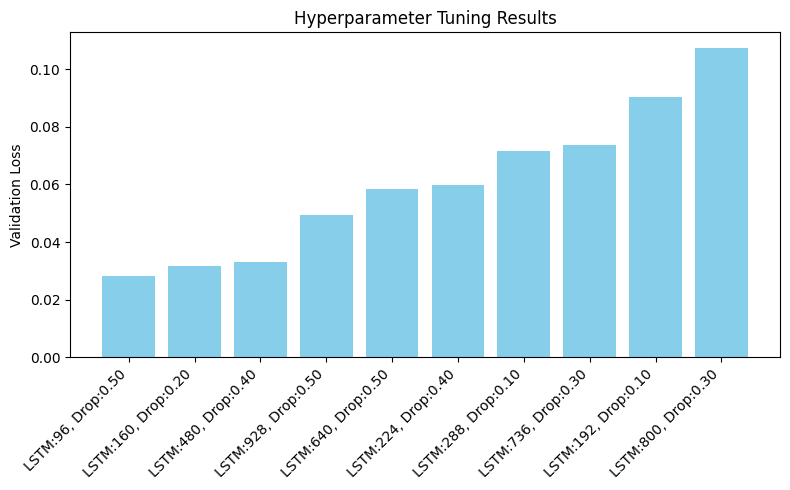

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.8827 - loss: 0.3576 - val_accuracy: 0.8553 - val_loss: 0.3263 - learning_rate: 0.0047
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9653 - loss: 0.1344 - val_accuracy: 0.8947 - val_loss: 0.3011 - learning_rate: 0.0047
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9930 - loss: 0.0586 - val_accuracy: 0.8553 - val_loss: 0.4767 - learning_rate: 0.0047
Epoch 4/60
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9805 - loss: 0.0954 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0023435538168996572.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9803 - loss: 0.0958 - val_accuracy: 0.8947 - val_loss: 0.3571 - learning_rate: 0.0047
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9974 - loss: 0.0391 - val_accuracy: 0.8947 - val_loss: 0.3283 - learning_rate: 0.0023
Epoch 6/60
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9965 - loss: 0.0383 
Epoch 6: R

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Install keras-tuner if not already installed

!pip install keras-tuner
import keras_tuner as kt

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

SLIDING_WINDOW = True
pad_value = -1.0

# ---------------------------
# GPU Configuration
# ---------------------------
!nvidia-smi

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled.")
    except RuntimeError as e:
        print("Error setting GPU memory growth:", e)
else:
    print("No GPU found.")

# ---------------------------
# Data Loading and Initial Preprocessing
# ---------------------------
# Assume your data dictionary is already defined with keys 'target_points' and 'activity'
x_raw, y_raw = data['target_points'], data['activity']

# Convert each sequence to a NumPy array.
x_raw = list(x_raw)
x_raw = [np.array(seq) for seq in x_raw]  # Each sequence has shape: (timesteps, 17, 2)

# === Helper Functions ===
def normalize_sequence(seq):
    return (seq - np.mean(seq, axis=0)) / (np.std(seq, axis=0) + 1e-8)

def rotate_sequence(seq, angle):
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    original_shape = seq.shape  # (timesteps, 17, 2)
    seq_reshaped = seq.reshape(-1, 2)
    rotated = np.dot(seq_reshaped, R.T).reshape(original_shape)
    return rotated

def add_noise(seq, noise_std=0.01):
    noise = np.random.normal(0, noise_std, seq.shape)
    return seq + noise

def augment_sequence(seq):
    angle = np.deg2rad(np.random.uniform(-5, 5))
    seq = rotate_sequence(seq, angle)
    seq = add_noise(seq, noise_std=0.01)
    return seq

def compute_velocity(seq):
    # Compute velocity as the difference between successive frames.
    return np.diff(seq, axis=0, prepend=seq[0:1])

def smooth_sequence(seq, window_size=3):
    kernel = np.ones(window_size) / window_size
    smoothed = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='same'),
                                   axis=0, arr=seq)
    return smoothed

def process_sequence(seq, do_augment=False):
    if do_augment:
        seq = augment_sequence(seq)
    seq = normalize_sequence(seq)
    seq = smooth_sequence(seq, window_size=3)
    vel = compute_velocity(seq)
    # Concatenate original coordinates and velocity along the last axis.
    seq_features = np.concatenate([seq, vel], axis=-1)  # New shape: (timesteps, 17, 4)
    return seq_features

def sliding_window(x_list, y_list, length, overlap):
    x_windows = []
    y_windows = []
    for i in range(len(x_list)):
        seq_len = len(x_list[i])
        for j in range(0, seq_len - length + 1, length - overlap):
            if j + length <= seq_len:
                x_windows.append(x_list[i][j : j + length])
                # Use positional indexing; if y_list is a pandas Series, use .iloc.
                if hasattr(y_list, 'iloc'):
                    y_windows.append(y_list.iloc[i])
                else:
                    y_windows.append(y_list[i])
    x_windows = np.array(x_windows)
    y_windows = np.array(y_windows).reshape(-1, 1)
    return x_windows, y_windows

# ---------------------------
# Data Splitting (at the raw sequence level)
# ---------------------------
# First, split the raw sequences into training, validation, and test sets.
# (Splitting before any windowing ensures windows from the same original sequence stay in one split.)
x_train_seq, x_temp_seq, y_train_seq, y_temp_seq = train_test_split(
    x_raw, y_raw, test_size=0.3, random_state=42, stratify=y_raw)
x_val_seq, x_test_seq, y_val_seq, y_test_seq = train_test_split(
    x_temp_seq, y_temp_seq, test_size=0.5, random_state=42, stratify=y_temp_seq)

# If y_* are pandas objects, reset their indices.
if hasattr(y_train_seq, 'reset_index'):
    y_train_seq = y_train_seq.reset_index(drop=True)
if hasattr(y_val_seq, 'reset_index'):
    y_val_seq = y_val_seq.reset_index(drop=True)
if hasattr(y_test_seq, 'reset_index'):
    y_test_seq = y_test_seq.reset_index(drop=True)

# ---------------------------
# Apply Sliding Window Segmentation
# ---------------------------

# Get average length of a x array
avg_length = np.mean([len(x) for x in x_train_seq])
print("Average length of x_train_seq:", avg_length)
if SLIDING_WINDOW:
    length = int(avg_length) //2
    overlap = int(length // 2)
    # Training windows (optionally augment during processing)
    x_train_windows, y_train_windows = sliding_window(x_train_seq, y_train_seq, length=length, overlap=overlap)
    # Validation and test windows (no augmentation)
    x_val_windows, y_val_windows = sliding_window(x_val_seq, y_val_seq, length=length, overlap=overlap)
    x_test_windows, y_test_windows = sliding_window(x_test_seq, y_test_seq, length=length, overlap=overlap)
else:
    x_train_windows, y_train_windows = np.array(x_train_seq), np.array(y_train_seq)
    x_val_windows, y_val_windows = np.array(x_val_seq), np.array(y_val_seq)
    x_test_windows, y_test_windows = np.array(x_test_seq), np.array(y_test_seq)

# ---------------------------
# Process Sequences
# ---------------------------
# Apply processing (and augmentation for training if desired)
x_train_processed = [process_sequence(seq, do_augment=True) for seq in x_train_windows]
x_val_processed = [process_sequence(seq, do_augment=False) for seq in x_val_windows]
x_test_processed = [process_sequence(seq, do_augment=False) for seq in x_test_windows]

# === Flatten Sequences ===
# Flatten each sequence from (timesteps, 17, 4) to (timesteps, 68)
x_train_flat = [seq.reshape(seq.shape[0], -1) for seq in x_train_processed]
x_val_flat   = [seq.reshape(seq.shape[0], -1) for seq in x_val_processed]
x_test_flat  = [seq.reshape(seq.shape[0], -1) for seq in x_test_processed]

# ---------------------------
# Handle Class Imbalance via Oversampling (Training Set Only)
# ---------------------------
# For training, oversample if necessary.
y_train_windows = np.array(y_train_windows)  # Ensure labels are a NumPy array.
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_windows)
num_classes = len(encoder.classes_)
print("Number of classes:", num_classes)

counter = Counter(y_train_encoded)
max_count = max(counter.values())
x_train_balanced = []
y_train_balanced = []
for cls in np.unique(y_train_encoded):
    indices = [i for i, label in enumerate(y_train_encoded) if label == cls]
    x_cls = [x_train_flat[i] for i in indices]
    y_cls = [y_train_encoded[i] for i in indices]
    num_to_add = max_count - len(x_cls)
    if num_to_add > 0:
        indices_to_sample = np.random.choice(len(x_cls), size=num_to_add, replace=True)
        x_cls += [x_cls[i] for i in indices_to_sample]
        y_cls += [cls] * num_to_add
    x_train_balanced.extend(x_cls)
    y_train_balanced.extend(y_cls)

# Convert oversampled lists to arrays.
x_train_balanced = np.array(x_train_balanced)
y_train_balanced = np.array(y_train_balanced)

# For validation and test sets, we do not apply oversampling.
# We assume the labels in y_val_windows and y_test_windows are not yet encoded.
y_val_encoded = encoder.transform(np.array(y_val_windows).flatten())
y_test_encoded = encoder.transform(np.array(y_test_windows).flatten())

# ---------------------------
# Padding Sequences
# ---------------------------
# Determine maximum lengths for each split
lengths_train = [seq.shape[0] for seq in x_train_balanced]
lengths_val = [seq.shape[0] for seq in x_val_flat]
lengths_test = [seq.shape[0] for seq in x_test_flat]

max_len_train = max(lengths_train)
max_len_val = max(lengths_val)
max_len_test = max(lengths_test)

# Pad each split separately.
x_train_padded = pad_sequences(x_train_balanced, maxlen=max_len_train, padding='post',
                               dtype='float32', value=pad_value)
x_val_padded = pad_sequences(x_val_flat, maxlen=max_len_val, padding='post',
                             dtype='float32', value=pad_value)
x_test_padded = pad_sequences(x_test_flat, maxlen=max_len_test, padding='post',
                              dtype='float32', value=pad_value)

# ---------------------------
# Final Data Assignment for Model Training
# ---------------------------
# For hyperparameter tuning, we use the balanced training set and the validation set.
x_train_final = x_train_padded
y_train_final = y_train_balanced  # (Already encoded during oversampling)
x_val_final = x_val_padded
y_val_final = y_val_encoded
x_test_final = x_test_padded
y_test_final = y_test_encoded

print("Train samples:", len(x_train_final))
print("Validation samples:", len(x_val_final))
print("Test samples:", len(x_test_final))
print("Training class distribution:", Counter(y_train_final.flatten()))

# ---------------------------
# Hyperparameter Tuning with Keras Tuner
# ---------------------------
print("\n----- Hyperparameter Tuning -----")
print("Train samples:", len(x_train_final))
print("Validation samples:", len(x_val_final))
print("Test samples:", len(x_test_final))

# Determine maximum sequence length from training data.
max_seq_len = max(len(seq) for seq in x_train_final)
print("Max training sequence length:", max_seq_len)

# --- Padding has already been done above. ---
num_features = x_train_final.shape[-1]  # Should be 68

# Function to create a tf.data.Dataset pipeline (if needed)
def create_dataset(x_data, y_data, batch_size, shuffle=False):
    dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1024)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Encode labels (training labels are already encoded)
# For consistency, we assume y_train_final, y_val_final, and y_test_final are integer-encoded.

# ----- Model Building with Val Loss as the Metric -----
def build_model(hp):
    inputs = Input(shape=(max_seq_len, num_features))
    masked = Masking(mask_value=pad_value)(inputs)

    # Hyperparameters
    lstm_units = hp.Int("lstm_units", min_value=32, max_value=1024, step=32)
    dropout_rate = hp.Float("dropout_rate", 0.1, 0.5, step=0.1)
    learning_rate = hp.Float("learning_rate", 1e-4, 1e-2, sampling="LOG")
    num_lstm_layers = hp.Int("num_lstm_layers", min_value=1, max_value=20, step=1)

    x = masked
    for i in range(num_lstm_layers):
        return_seq = True if i < num_lstm_layers - 1 else False
        x = LSTM(lstm_units, return_sequences=return_seq, dropout=0.2)(x)
    if hp.Boolean("use_batch_norm", default=True):
        x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)

    reg_choice = hp.Choice("regularizer", values=["l1", "l2"])
    if reg_choice == "l1":
        regularizer = tf.keras.regularizers.l1(0.01)
    else:
        regularizer = tf.keras.regularizers.l2(0.01)



    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=regularizer)(x)
    model = Model(inputs=inputs, outputs=outputs)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ----- Hyperparameter Tuning -----
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_loss", direction="min"),
    max_trials=120,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='my_project'
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=False),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)
]

tuner.search(x_train_final, y_train_final, epochs=60, validation_data=(x_val_final, y_val_final), callbacks=callbacks)

# Retrieve the best hyperparameters.
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print("  LSTM Units:", best_hp.get('lstm_units'))
print("  Dropout Rate:", best_hp.get('dropout_rate'))
print("  Learning Rate:", best_hp.get('learning_rate'))
print("  Number of LSTM Layers:", best_hp.get('num_lstm_layers'))
print("  Regularizer:", best_hp.get('regularizer'))
print("  Use Batch Normalization:", best_hp.get('use_batch_norm'))

# Gather trial results and plot (optional)
trial_results = []
for trial in tuner.oracle.get_best_trials(num_trials=10):
    hp_vals = trial.hyperparameters.values
    val_loss = trial.metrics.get_best_value('val_loss')
    trial_results.append({
        'LSTM Units': hp_vals['lstm_units'],
        'Dropout Rate': hp_vals['dropout_rate'],
        'Learning Rate': hp_vals['learning_rate'],
        'Number of LSTM Layers': hp_vals['num_lstm_layers'],
        'Regularizer': hp_vals['regularizer'],
        'Val Loss': val_loss
    })

hp_results_df = pd.DataFrame(trial_results)
print("\nHyperparameter Tuning Results:")
print(hp_results_df)

config_labels = hp_results_df.apply(
    lambda row: f"LSTM:{row['LSTM Units']}, Drop:{row['Dropout Rate']:.2f}", axis=1
)
plt.figure(figsize=(8,5))
plt.bar(config_labels, hp_results_df['Val Loss'], color='skyblue')
plt.ylabel("Validation Loss")
plt.title("Hyperparameter Tuning Results")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Retrieve the best model and its training history.
best_model = tuner.get_best_models(num_models=1)[0]
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]

# Save the best model.
best_model.save('keras_tuner_model.h5')
best_model.save('keras_tuner_model.keras')

# Save tuning history.
history = best_trial.metrics.get_history('val_loss')
np.save('history.npy', history)

# Optionally, retrain the best model on the training data.
history = best_model.fit(x_train_final, y_train_final, epochs=60, validation_data=(x_val_final, y_val_final), callbacks=callbacks)


1. Importing Libraries
python
Copy
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
NumPy: Used for numerical operations and array manipulations.
TensorFlow & Keras: Build and train deep learning models.
pad_sequences: Ensures all sequences have the same length for model input.
scikit-learn (train_test_split, LabelEncoder): Helps in splitting data into sets and encoding categorical labels.
Counter: Useful for counting occurrences in data (helpful for class balancing).
2. GPU Setup
python
Copy
# Print GPU status
!nvidia-smi

# --- GPU Configuration ---
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU memory growth enabled.")
    except RuntimeError as e:
        print("Error setting GPU memory growth:", e)
else:
    print("No GPU found.")
GPU Status Check: The !nvidia-smi command displays current GPU usage.
Memory Growth:
tf.config.experimental.set_memory_growth(gpu, True) ensures that TensorFlow allocates GPU memory as needed, rather than reserving all available memory at once.
Why it’s helpful: Prevents out-of-memory errors and allows other processes to run on the GPU concurrently.
3. Data Loading
python
Copy
# Load your data; ensure `data` is defined.
# Assume data is a dictionary with keys 'target_points' and 'activity'
x, y = data['target_points'], data['activity']

# Convert each sequence to a NumPy array.
x = list(x)
x = [np.array(seq) for seq in x]  # Each seq shape: (timesteps, 17, 2)
Data Assumptions:
data['target_points']: Contains sequences with shape (timesteps, 17, 2), where 17 might represent keypoints and 2 represents (x, y) coordinates.
data['activity']: Contains the corresponding labels.
Why it’s helpful: Converting data to NumPy arrays allows efficient numerical computations and compatibility with TensorFlow.
4. Helper Functions for Data Manipulation
a. Normalization
python
Copy
def normalize_sequence(seq):
    """Z-score normalization for each coordinate dimension."""
    return (seq - np.mean(seq, axis=0)) / (np.std(seq, axis=0) + 1e-8)
Purpose: Scales the data so that each coordinate has zero mean and unit variance.
Why it’s helpful: Improves convergence during training by ensuring that all features have similar scales.
b. Rotation
python
Copy
def rotate_sequence(seq, angle):
    """Rotate the (x,y) coordinates by a given angle (in radians)."""
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    original_shape = seq.shape  # (timesteps, 17, 2)
    seq_reshaped = seq.reshape(-1, 2)  # Flatten to (timesteps*17, 2)
    rotated = np.dot(seq_reshaped, R.T).reshape(original_shape)
    return rotated
Purpose: Rotates the coordinate data by a given angle.
Why it’s helpful: Provides data augmentation to help the model learn rotational invariance.
c. Noise Addition
python
Copy
def add_noise(seq, noise_std=0.01):
    """Add Gaussian noise to the sequence."""
    noise = np.random.normal(0, noise_std, seq.shape)
    return seq + noise
Purpose: Introduces slight randomness to mimic sensor noise.
Why it’s helpful: Makes the model more robust to noisy inputs.
d. Augmentation
python
Copy
def augment_sequence(seq):
    """Apply a random rotation (within ±5°) and add noise."""
    angle = np.deg2rad(np.random.uniform(-5, 5))
    seq = rotate_sequence(seq, angle)
    seq = add_noise(seq, noise_std=0.01)
    return seq
Purpose: Combines rotation and noise addition to create augmented versions of the input.
Why it’s helpful: Increases data diversity, reducing overfitting.
e. Velocity Computation
python
Copy
def compute_velocity(seq):
    """
    Compute velocity as the difference between successive frames.
    The first frame's velocity is set to zero.
    """
    vel = np.diff(seq, axis=0, prepend=seq[0:1])
    return vel
Purpose: Calculates the change between successive timesteps.
Why it’s helpful: Captures the dynamics of motion, which may be crucial for understanding activities.
f. Smoothing
python
Copy
def smooth_sequence(seq, window_size=3):
    """Apply a simple moving average filter along the time axis."""
    kernel = np.ones(window_size) / window_size
    smoothed = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='same'),
                                   axis=0, arr=seq)
    return smoothed
Purpose: Reduces noise by averaging values over a sliding window.
Why it’s helpful: Provides a smoother signal for the model to learn from.
g. Process Sequence
python
Copy
def process_sequence(seq, do_augment=False):
    """
    Process one sequence:
      - Optionally augment (only for training).
      - Normalize.
      - Smooth.
      - Compute velocity and concatenate it to the original features.
    """
    if do_augment:
        seq = augment_sequence(seq)
    seq = normalize_sequence(seq)
    seq = smooth_sequence(seq, window_size=3)
    vel = compute_velocity(seq)
    # Concatenate original coordinates and velocity along the last axis.
    seq_features = np.concatenate([seq, vel], axis=-1)  # Now shape: (timesteps, 17, 4)
    return seq_features
Purpose: Central function that applies augmentation (if desired), normalization, smoothing, and computes velocity.
Why it’s helpful: Enhances the raw data with additional features (velocity) and robustness (via augmentation and smoothing).
5. Data Processing Pipeline
a. Process All Sequences
python
Copy
# Process all sequences without augmentation (we'll apply augmentation later during training if desired)
x_processed = [process_sequence(seq, do_augment=False) for seq in x]
Purpose: Apply the processing steps to every sequence.
Why it’s helpful: Prepares a consistent and enriched feature set for the model.
b. Flatten Sequences
python
Copy
# Flatten each sequence from (timesteps, 17, 4) to (timesteps, 68)
x_flattened = [seq.reshape(seq.shape[0], -1) for seq in x_processed]
Purpose: Converts each timestep from a 2D structure (17 keypoints × 4 features) to a 1D feature vector of length 68.
Why it’s helpful: Many models expect 2D inputs (time steps, features), so flattening is necessary.
6. Handling Class Imbalance
a. Encode Labels
python
Copy
y = np.array(y)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
num_classes = len(encoder.classes_)
print("Number of classes:", num_classes)
Purpose: Converts string labels into numeric form.
Why it’s helpful: Numeric labels are required for training models.
b. Oversampling
python
Copy
# Count class frequencies.
counter = Counter(y_encoded)
max_count = max(counter.values())
x_balanced = []
y_balanced = []
for cls in np.unique(y_encoded):
    indices = [i for i, label in enumerate(y_encoded) if label == cls]
    x_cls = [x_flattened[i] for i in indices]
    y_cls = [y_encoded[i] for i in indices]
    # Oversample if needed.
    num_to_add = max_count - len(x_cls)
    if num_to_add > 0:
        indices_to_sample = np.random.choice(len(x_cls), size=num_to_add, replace=True)
        x_cls += [x_cls[i] for i in indices_to_sample]
        y_cls += [cls] * num_to_add
    x_balanced.extend(x_cls)
    y_balanced.extend(y_cls)
y_balanced = np.array(y_balanced)
Purpose: Ensures each class has an equal number of samples by duplicating underrepresented examples.
Why it’s helpful: Reduces bias towards majority classes, improving model fairness and performance.
7. Outlier Detection and Removal
python
Copy
# Outlier Detection: Remove sequences with extreme lengths
lengths = np.array([seq.shape[0] for seq in x_balanced])
median_length = np.median(lengths)
std_length = np.std(lengths)
valid_indices = [i for i, l in enumerate(lengths) if abs(l - median_length) <= 2 * std_length]
x_final = [x_balanced[i] for i in valid_indices]
y_final = y_balanced[valid_indices]
Purpose: Remove sequences whose lengths deviate significantly from the median.
Why it’s helpful: Outlier sequences can introduce noise and disrupt training, so filtering them creates a more consistent dataset.
8. Update Feature Dimension
python
Copy
# Update feature dimension (should be 68 if each timestep has 17 points × 4 values)
num_features = x_final[0].shape[1]
print("Updated feature dimension per timestep:", num_features)
Purpose: Confirm the final number of features per timestep.
Why it’s helpful: Ensures that subsequent model layers receive data with the correct shape.
9. Padding Sequences
python
Copy
# Pad sequences so that they all have the same length.
pad_value = -1.0
x_padded = pad_sequences(x_final, maxlen=max(lengths), padding='post', dtype='float32', value=pad_value)
Purpose: Makes all sequences the same length by adding a padding value.
Why it’s helpful: Neural networks require inputs of uniform size. Padding allows variable-length sequences to be batched together.
10. Final Data Split
python
Copy
# Split the data: 70% train, 15% validation, 15% test.
x_train, x_temp, y_train, y_temp = train_test_split(
    x_padded, y_final, test_size=0.3, random_state=42, stratify=y_final)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train samples:", len(x_train))
print("Validation samples:", len(x_val))
print("Test samples:", len(x_test))
Purpose: Divides the data into training, validation, and test sets.
Why it’s helpful:
Training set: For learning model parameters.
Validation set: For tuning hyperparameters and early stopping.
Test set: For unbiased evaluation of model performance.
Stratification: Ensures each split has a similar distribution of classes.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9737 - loss: 0.1624
Test Accuracy: [0.14875473082065582, 0.976190447807312]


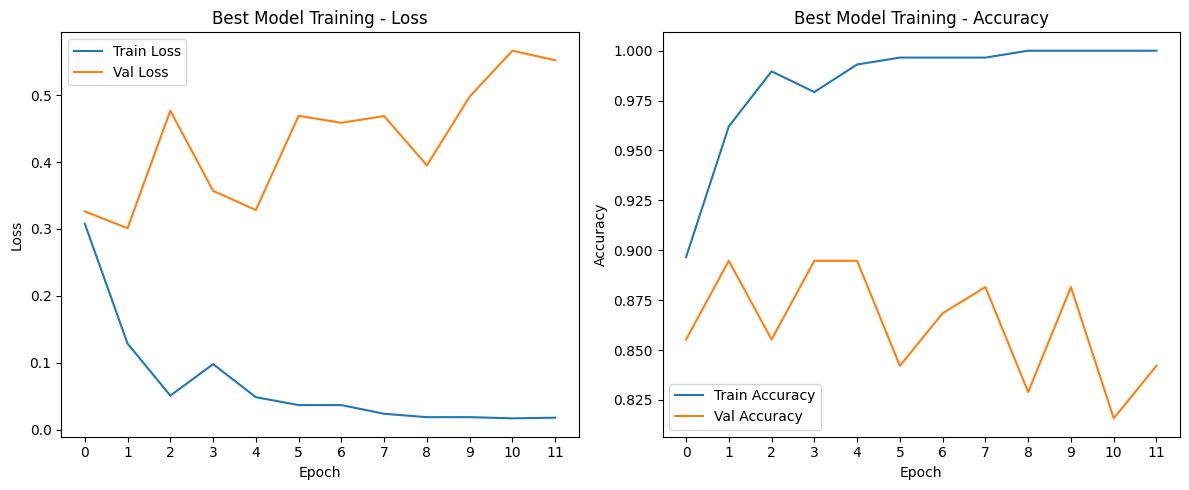

{'accuracy': [0.8965517282485962, 0.9620689749717712, 0.9896551966667175, 0.9793103337287903, 0.9931034445762634, 0.9965517520904541, 0.9965517520904541, 0.9965517520904541, 1.0, 1.0, 1.0, 1.0], 'loss': [0.30792349576950073, 0.12877391278743744, 0.05111449211835861, 0.09804718941450119, 0.04870550334453583, 0.03692782670259476, 0.03689800202846527, 0.023946447297930717, 0.018865598365664482, 0.018913250416517258, 0.017121417447924614, 0.018087562173604965], 'val_accuracy': [0.8552631735801697, 0.8947368264198303, 0.8552631735801697, 0.8947368264198303, 0.8947368264198303, 0.8421052694320679, 0.8684210777282715, 0.8815789222717285, 0.8289473652839661, 0.8815789222717285, 0.8157894611358643, 0.8421052694320679], 'val_loss': [0.3263103663921356, 0.30114853382110596, 0.4766969084739685, 0.3570599853992462, 0.32831770181655884, 0.46912774443626404, 0.4586733877658844, 0.46874362230300903, 0.395014226436615, 0.4978937804698944, 0.5663572549819946, 0.5521016716957092], 'learning_rate': [0.004

In [ ]:
# get test accuracy
test_accuracy = best_model.evaluate(x_test_final, y_test_final)
print("Test Accuracy:", test_accuracy)
# Function to plot learning curves
def plot_learning_curves(history, title="Learning Curves"):
    plt.figure(figsize=(12,5))

    # Loss curves
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    ## modify x axis to be integers
    plt.xticks(range(0, len(history.history['loss']), 1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    # Accuracy curves
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    ## modify x axis to be integers

    plt.xticks(range(0, len(history.history['accuracy']), 1))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the learning curves for the best model
plot_learning_curves(history, title="Best Model Training")
print(history.history)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 40 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved op

Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9128 - loss: 0.3189 - val_accuracy: 0.8421 - val_loss: 0.3100 - learning_rate: 0.0047
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9354 - loss: 0.1765 - val_accuracy: 0.8816 - val_loss: 0.2824 - learning_rate: 0.0047
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9758 - loss: 0.0741 - val_accuracy: 0.8684 - val_loss: 0.3518 - learning_rate: 0.0047
Epoch 4/60
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9942 - loss: 0.0405 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0023435538168996572.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9934 - loss: 0.0415 - val_accuracy: 0.8684 - val_loss: 0.3650 - learning_rate: 0.0047
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9915 - loss: 0.0385 - val_accuracy: 0.8684 - val_loss: 0.3620 - learning_rate: 0.0023
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9921 - loss: 0.0389 
Epoch 6: ReduceLROnPl

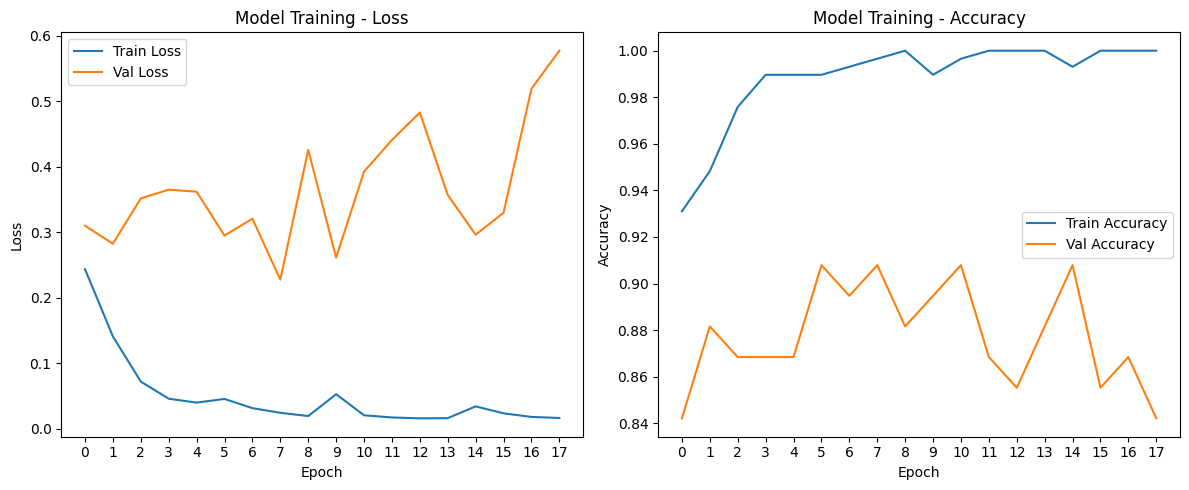

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.8857 - loss: 0.3260 - val_accuracy: 0.8684 - val_loss: 0.5059 - learning_rate: 0.0020
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9078 - loss: 0.3156 - val_accuracy: 0.8553 - val_loss: 0.4440 - learning_rate: 0.0020
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9681 - loss: 0.1248 - val_accuracy: 0.8816 - val_loss: 0.4060 - learning_rate: 0.0020
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9555 - loss: 0.1636 - val_accuracy: 0.8289 - val_loss: 0.5296 - learning_rate: 0.0020
Epoch 5/60
 6/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9774 - loss: 0.1243
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0010036383755505085.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9750 - loss: 0.1282 - val_accuracy: 0.8289 - val_loss: 0.4973 - learning_rate: 0.0020
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9772 - loss: 0.1011 - val_acc

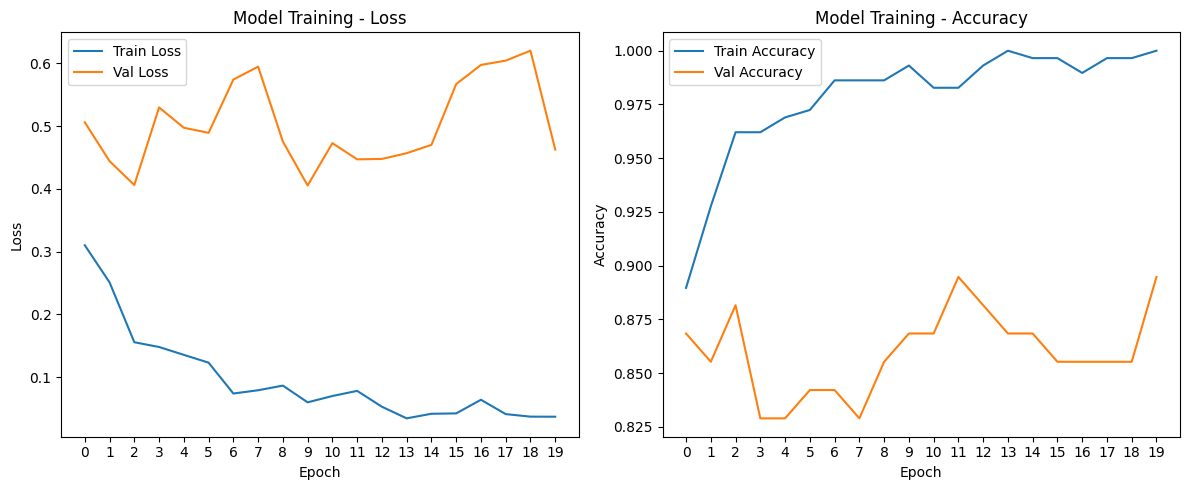

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7997 - loss: 0.6955 - val_accuracy: 0.9079 - val_loss: 0.3471 - learning_rate: 0.0055
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9106 - loss: 0.2667 - val_accuracy: 0.9079 - val_loss: 0.3681 - learning_rate: 0.0055
Epoch 3/60
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9688 - loss: 0.1455
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.002765930024906993.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9710 - loss: 0.1229 - val_accuracy: 0.8158 - val_loss: 0.5835 - learning_rate: 0.0055
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9733 - loss: 0.0857 - val_accuracy: 0.8289 - val_loss: 0.5125 - learning_rate: 0.0028
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9687 - loss: 0.0914 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0013829650124534965.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9681 - loss: 0.0929 - val_accura

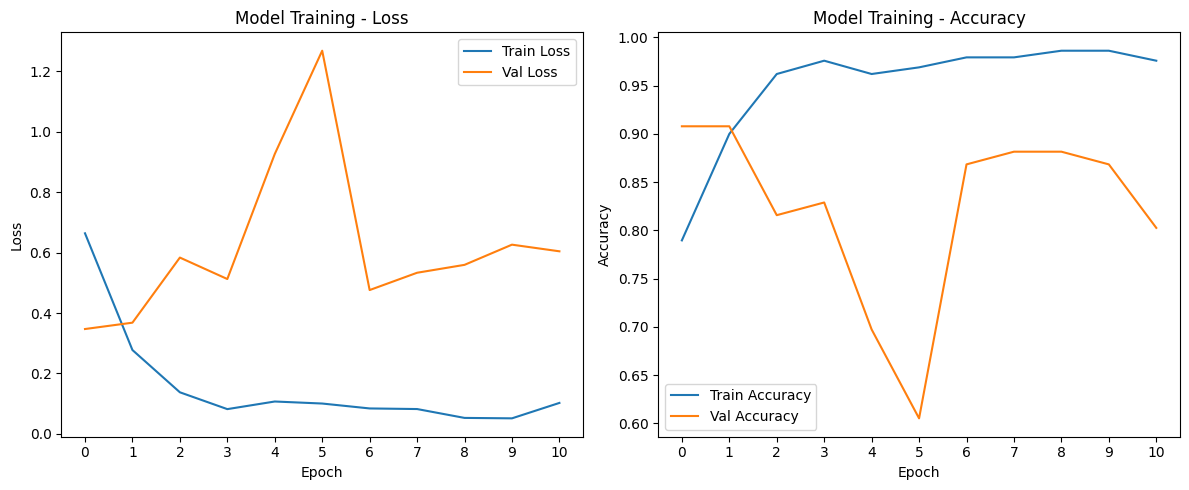

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7393 - loss: 0.7665 - val_accuracy: 0.4342 - val_loss: 1.0197 - learning_rate: 0.0048
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7438 - loss: 0.5393 - val_accuracy: 0.5921 - val_loss: 0.8342 - learning_rate: 0.0048
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9073 - loss: 0.2763 - val_accuracy: 0.8421 - val_loss: 0.3975 - learning_rate: 0.0048
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9266 - loss: 0.2087 - val_accuracy: 0.6842 - val_loss: 0.9340 - learning_rate: 0.0048
Epoch 5/60
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9375 - loss: 0.2269
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0024081270676106215.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9341 - loss: 0.2003 - val_accuracy: 0.7632 - val_loss: 0.8779 - learning_rate: 0.0048
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9386 - loss: 0.2580 - val_accu

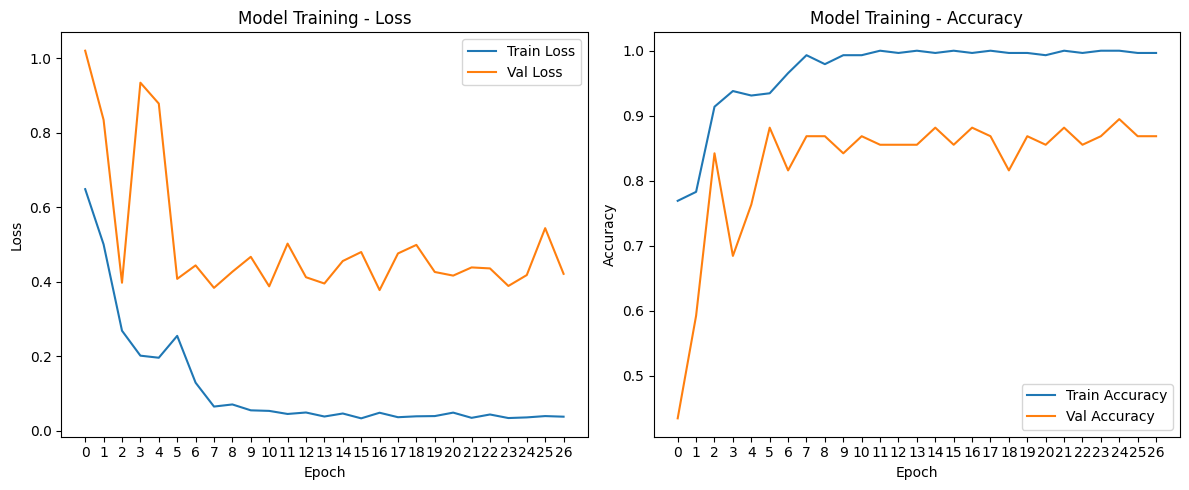

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8791 - loss: 0.4299 - val_accuracy: 0.8816 - val_loss: 0.3855 - learning_rate: 1.0101e-04
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9110 - loss: 0.3337 - val_accuracy: 0.8816 - val_loss: 0.3375 - learning_rate: 1.0101e-04
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9065 - loss: 0.2398 - val_accuracy: 0.9342 - val_loss: 0.2582 - learning_rate: 1.0101e-04
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9514 - loss: 0.1648 - val_accuracy: 0.8684 - val_loss: 0.2980 - learning_rate: 1.0101e-04
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9112 - loss: 0.2706 - val_accuracy: 0.9211 - val_loss: 0.2418 - learning_rate: 1.0101e-04
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9488 - loss: 0.1840 - val_accuracy: 0.8947 - val_loss: 0.3306 - learning_rate: 1.0101e-04
Epoch 7/60
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9375 

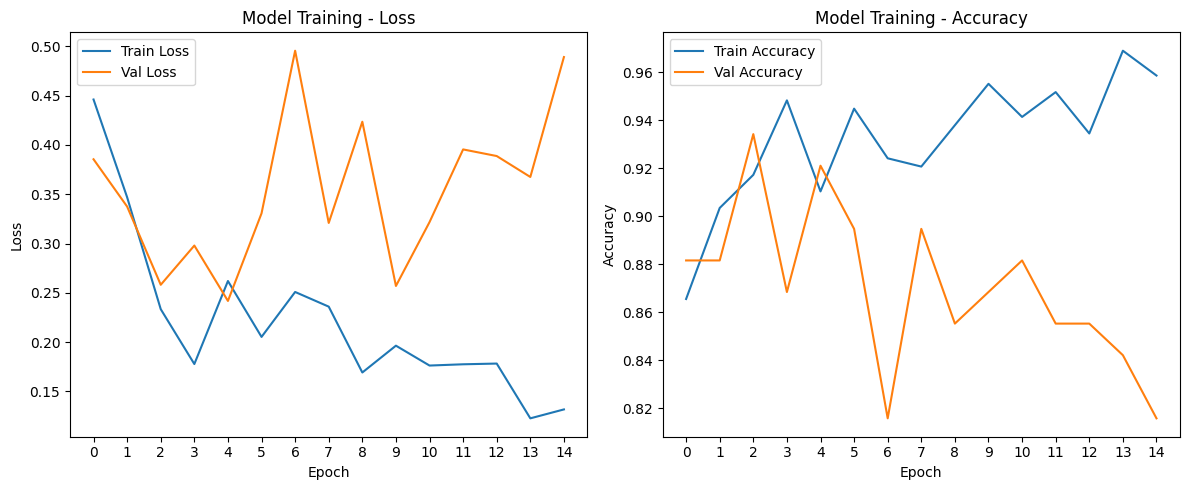

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.7272 - loss: 0.7020 - val_accuracy: 0.7105 - val_loss: 0.5861 - learning_rate: 0.0035
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7186 - loss: 0.5662 - val_accuracy: 0.5000 - val_loss: 0.6893 - learning_rate: 0.0035
Epoch 3/60
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7415 - loss: 0.5594
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0017612772062420845.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7509 - loss: 0.5519 - val_accuracy: 0.7763 - val_loss: 0.6488 - learning_rate: 0.0035
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8787 - loss: 0.3389 - val_accuracy: 0.8026 - val_loss: 0.7117 - learning_rate: 0.0018
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8741 - loss: 0.3574 - val_accuracy: 0.8421 - val_loss: 0.4409 - learning_rate: 0.0018
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8593 - loss: 0.3996 - val_acc

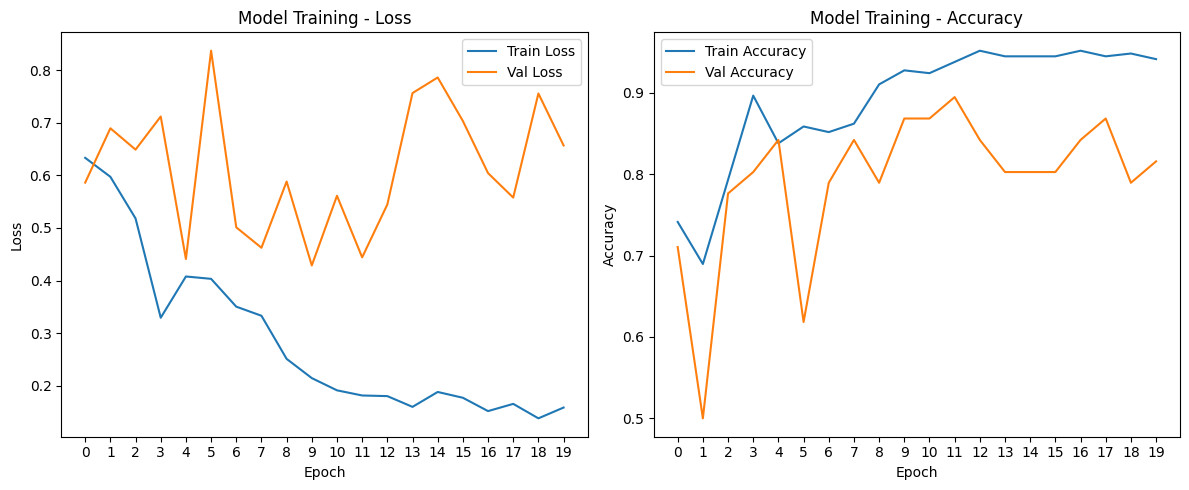

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8348 - loss: 0.4656 - val_accuracy: 0.8158 - val_loss: 0.6285 - learning_rate: 0.0077
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9083 - loss: 0.3632 - val_accuracy: 0.8026 - val_loss: 0.4894 - learning_rate: 0.0077
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9850 - loss: 0.1399 - val_accuracy: 0.8289 - val_loss: 0.6814 - learning_rate: 0.0077
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9729 - loss: 0.1796 - val_accuracy: 0.8684 - val_loss: 0.4175 - learning_rate: 0.0077
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9738 - loss: 0.1541 - val_accuracy: 0.8684 - val_loss: 0.5136 - learning_rate: 0.0077
Epoch 6/60
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9731 - loss: 0.1658 
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0038333104457706213.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9736 - loss: 0.1624 - val_accu

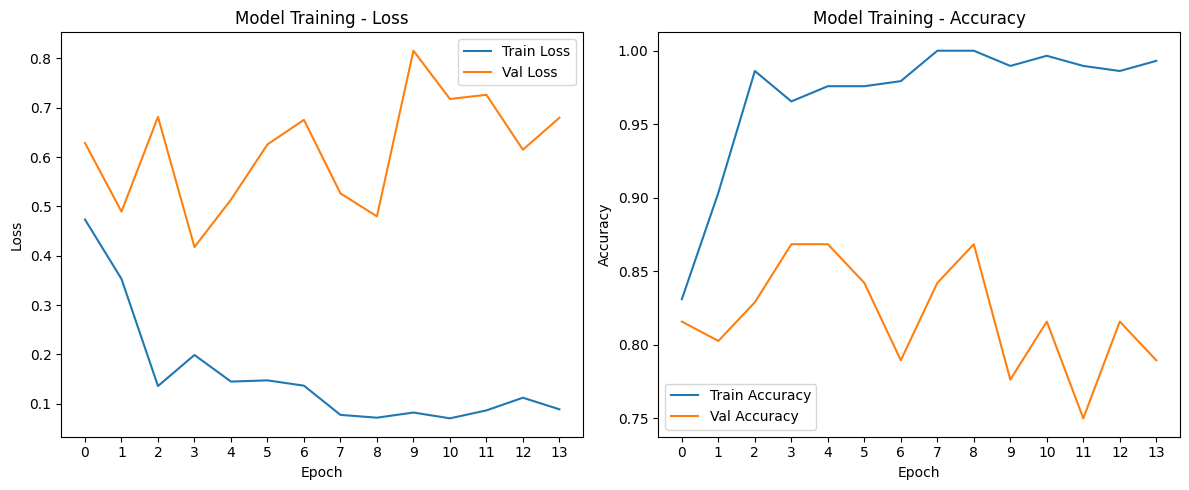

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9195 - loss: 0.3107 - val_accuracy: 0.8026 - val_loss: 0.4741 - learning_rate: 0.0014
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9405 - loss: 0.2468 - val_accuracy: 0.8553 - val_loss: 0.5060 - learning_rate: 0.0014
Epoch 3/60
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.1440
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0007002985803410411.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9735 - loss: 0.1838 - val_accuracy: 0.8421 - val_loss: 0.5174 - learning_rate: 0.0014
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9754 - loss: 0.1789 - val_accuracy: 0.8684 - val_loss: 0.4362 - learning_rate: 7.0030e-04
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9894 - loss: 0.1496 - val_accuracy: 0.8816 - val_loss: 0.5198 - learning_rate: 7.0030e-04
Epoch 6/60
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.1115
Ep

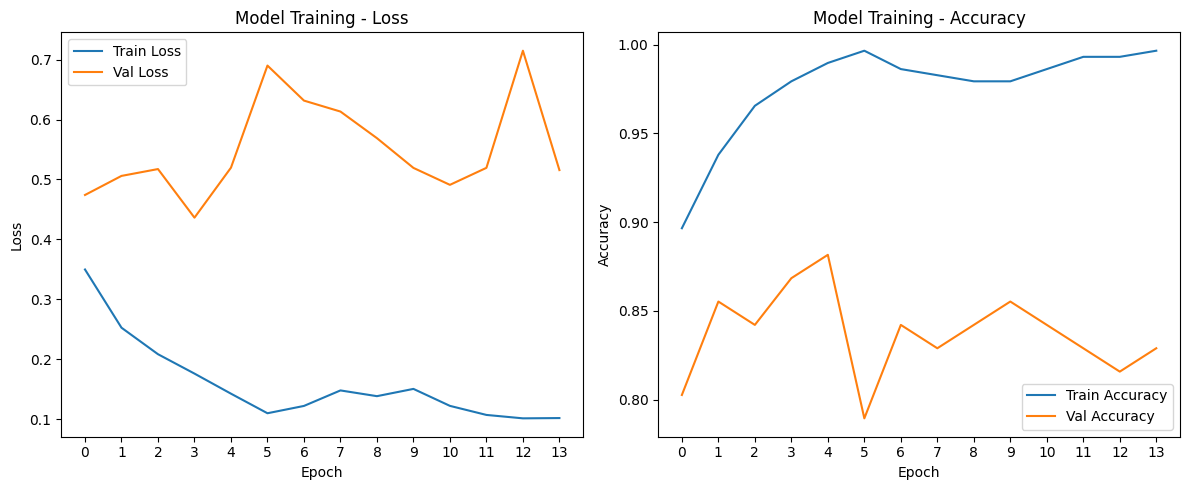

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8926 - loss: 0.2985 - val_accuracy: 0.8421 - val_loss: 0.4080 - learning_rate: 2.7862e-04
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9510 - loss: 0.1768 - val_accuracy: 0.8684 - val_loss: 0.3606 - learning_rate: 2.7862e-04
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9630 - loss: 0.1497 - val_accuracy: 0.8684 - val_loss: 0.3126 - learning_rate: 2.7862e-04
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9815 - loss: 0.1033 - val_accuracy: 0.8684 - val_loss: 0.4489 - learning_rate: 2.7862e-04
Epoch 5/60
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0875
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00013930884597357363.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9909 - loss: 0.0921 - val_accuracy: 0.8158 - val_loss: 0.4510 - learning_rate: 2.7862e-04
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9944 - lo

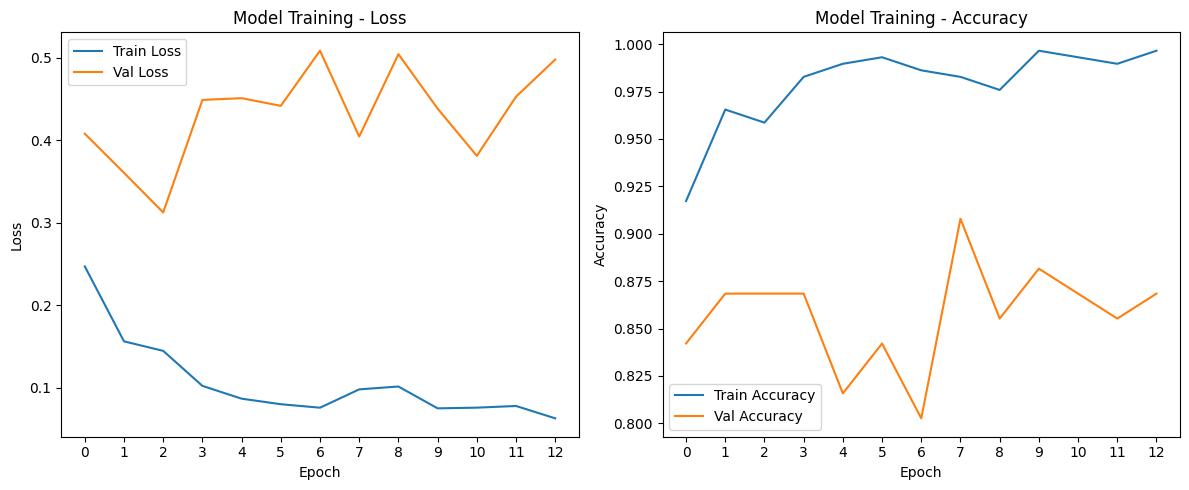

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.8407 - loss: 0.4835 - val_accuracy: 0.8947 - val_loss: 0.3508 - learning_rate: 1.7089e-04
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8932 - loss: 0.2689 - val_accuracy: 0.8684 - val_loss: 0.3480 - learning_rate: 1.7089e-04
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9328 - loss: 0.1720 - val_accuracy: 0.8947 - val_loss: 0.3276 - learning_rate: 1.7089e-04
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9406 - loss: 0.1806 - val_accuracy: 0.8947 - val_loss: 0.3345 - learning_rate: 1.7089e-04
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9375 - loss: 0.2384
Epoch 5: ReduceLROnPlateau reducing learning rate to 8.544518641429022e-05.
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9366 - loss: 0.2384 - val_accuracy: 0.8289 - val_loss: 0.4695 - learning_rate: 1.7089e-04
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9298 - lo

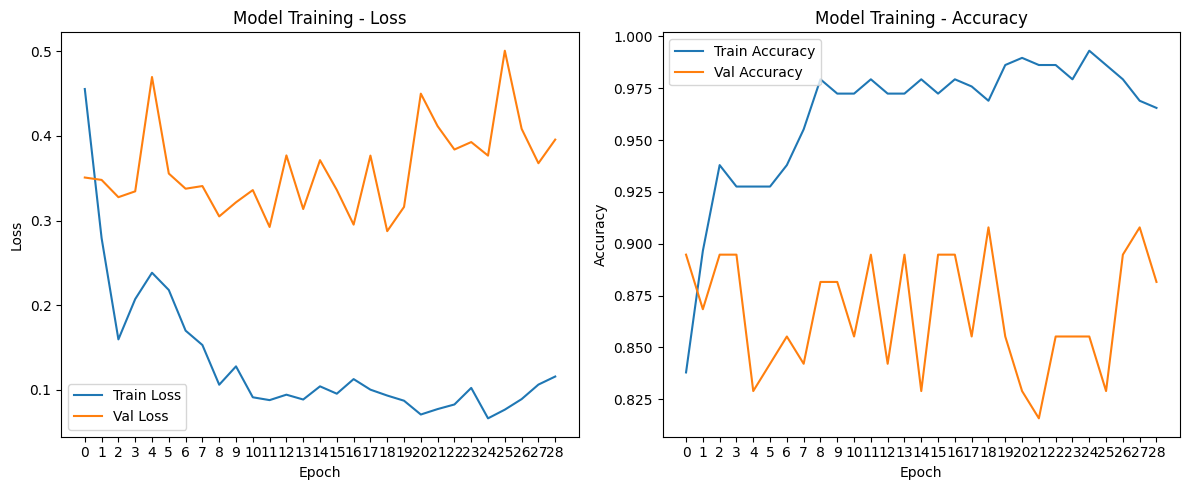

In [ ]:
for model in tuner.get_best_models(num_models=10):
  history_i = model.fit(x_train_final, y_train_final, epochs=60, validation_data=(x_val_final, y_val_final), callbacks=callbacks)
  test_accuracy_i = model.evaluate(x_test_final, y_test_final)
  print("Test Accuracy:", test_accuracy_i)
  plot_learning_curves(history_i, title="Model Training")



In [ ]:
# Savinf the best model
best_model.save('fullymodified_data_model_84.h5')
best_model.save('fullymodified_data_model_84.keras') # Changed extension to .keras


In [ ]:

# # Assume you have a new sequence named new_seq with shape (timesteps, 17, 2)
# # and that you have already imported and defined the helper functions
# # (normalize_sequence, smooth_sequence, compute_velocity, process_sequence).
# new_seq = x[0]
# def prepare_new_sequence(seq, max_len, pad_value=-1.0):
#     """
#     Preprocess a new sequence for classification:
#       - Apply processing (normalization, smoothing, velocity computation).
#       - Flatten the sequence.
#       - Pad the sequence to the desired max_len.
#     """
#     # Process the sequence (do_augment should be False for inference)
#     processed = process_sequence(seq, do_augment=False)  # Output shape: (timesteps, 17, 4)

#     # Flatten the sequence from (timesteps, 17, 4) to (timesteps, 68)
#     flattened = processed.reshape(processed.shape[0], -1)

#     # Pad the sequence so it matches the model's expected input shape.
#     padded = pad_sequences([flattened], maxlen=max_len, padding='post', dtype='float32', value=pad_value)
#     # The padded array shape will be (1, max_len, 68)
#     return padded

# # Example usage:
# # new_seq = ... (your new data with shape (timesteps, 17, 2))
# # For this example, assume max_len is the same as used in training.
# new_seq_preprocessed = prepare_new_sequence(new_seq, max_len=max_len)
# print(new_seq_preprocessed)
# # Now, use your trained model to classify the new sequence:
# predictions = best_model.predict(new_seq_preprocessed)
# predicted_class = np.argmax(predictions, axis=1)
# print("Predicted class:", predicted_class)
# print(y[0])
# print(y_encoded[0])


In [ ]:

accuracy = best_model.evaluate(x_test_final, y_test_final)
print("Test Accuracy:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9737 - loss: 0.0579 
Test Accuracy: [0.05379630997776985, 0.976190447807312]


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 17, 68)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 17, 68)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking (Masking)         │ (None, 17, 68)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any_1 (Any)               │ (None, 17)             │              0 │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 17, 96)         │         63,360 │ masking[0][0],         │
│                           │                        │                │ any_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 96)             │         74,112 │ lstm[0][0],            │
│                           │                        │                │ any_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 96)             │              0 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2)              │            194 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 275,334 (1.05 MB)

 Trainable params: 137,666 (537.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 137,668 (537.77 KB)

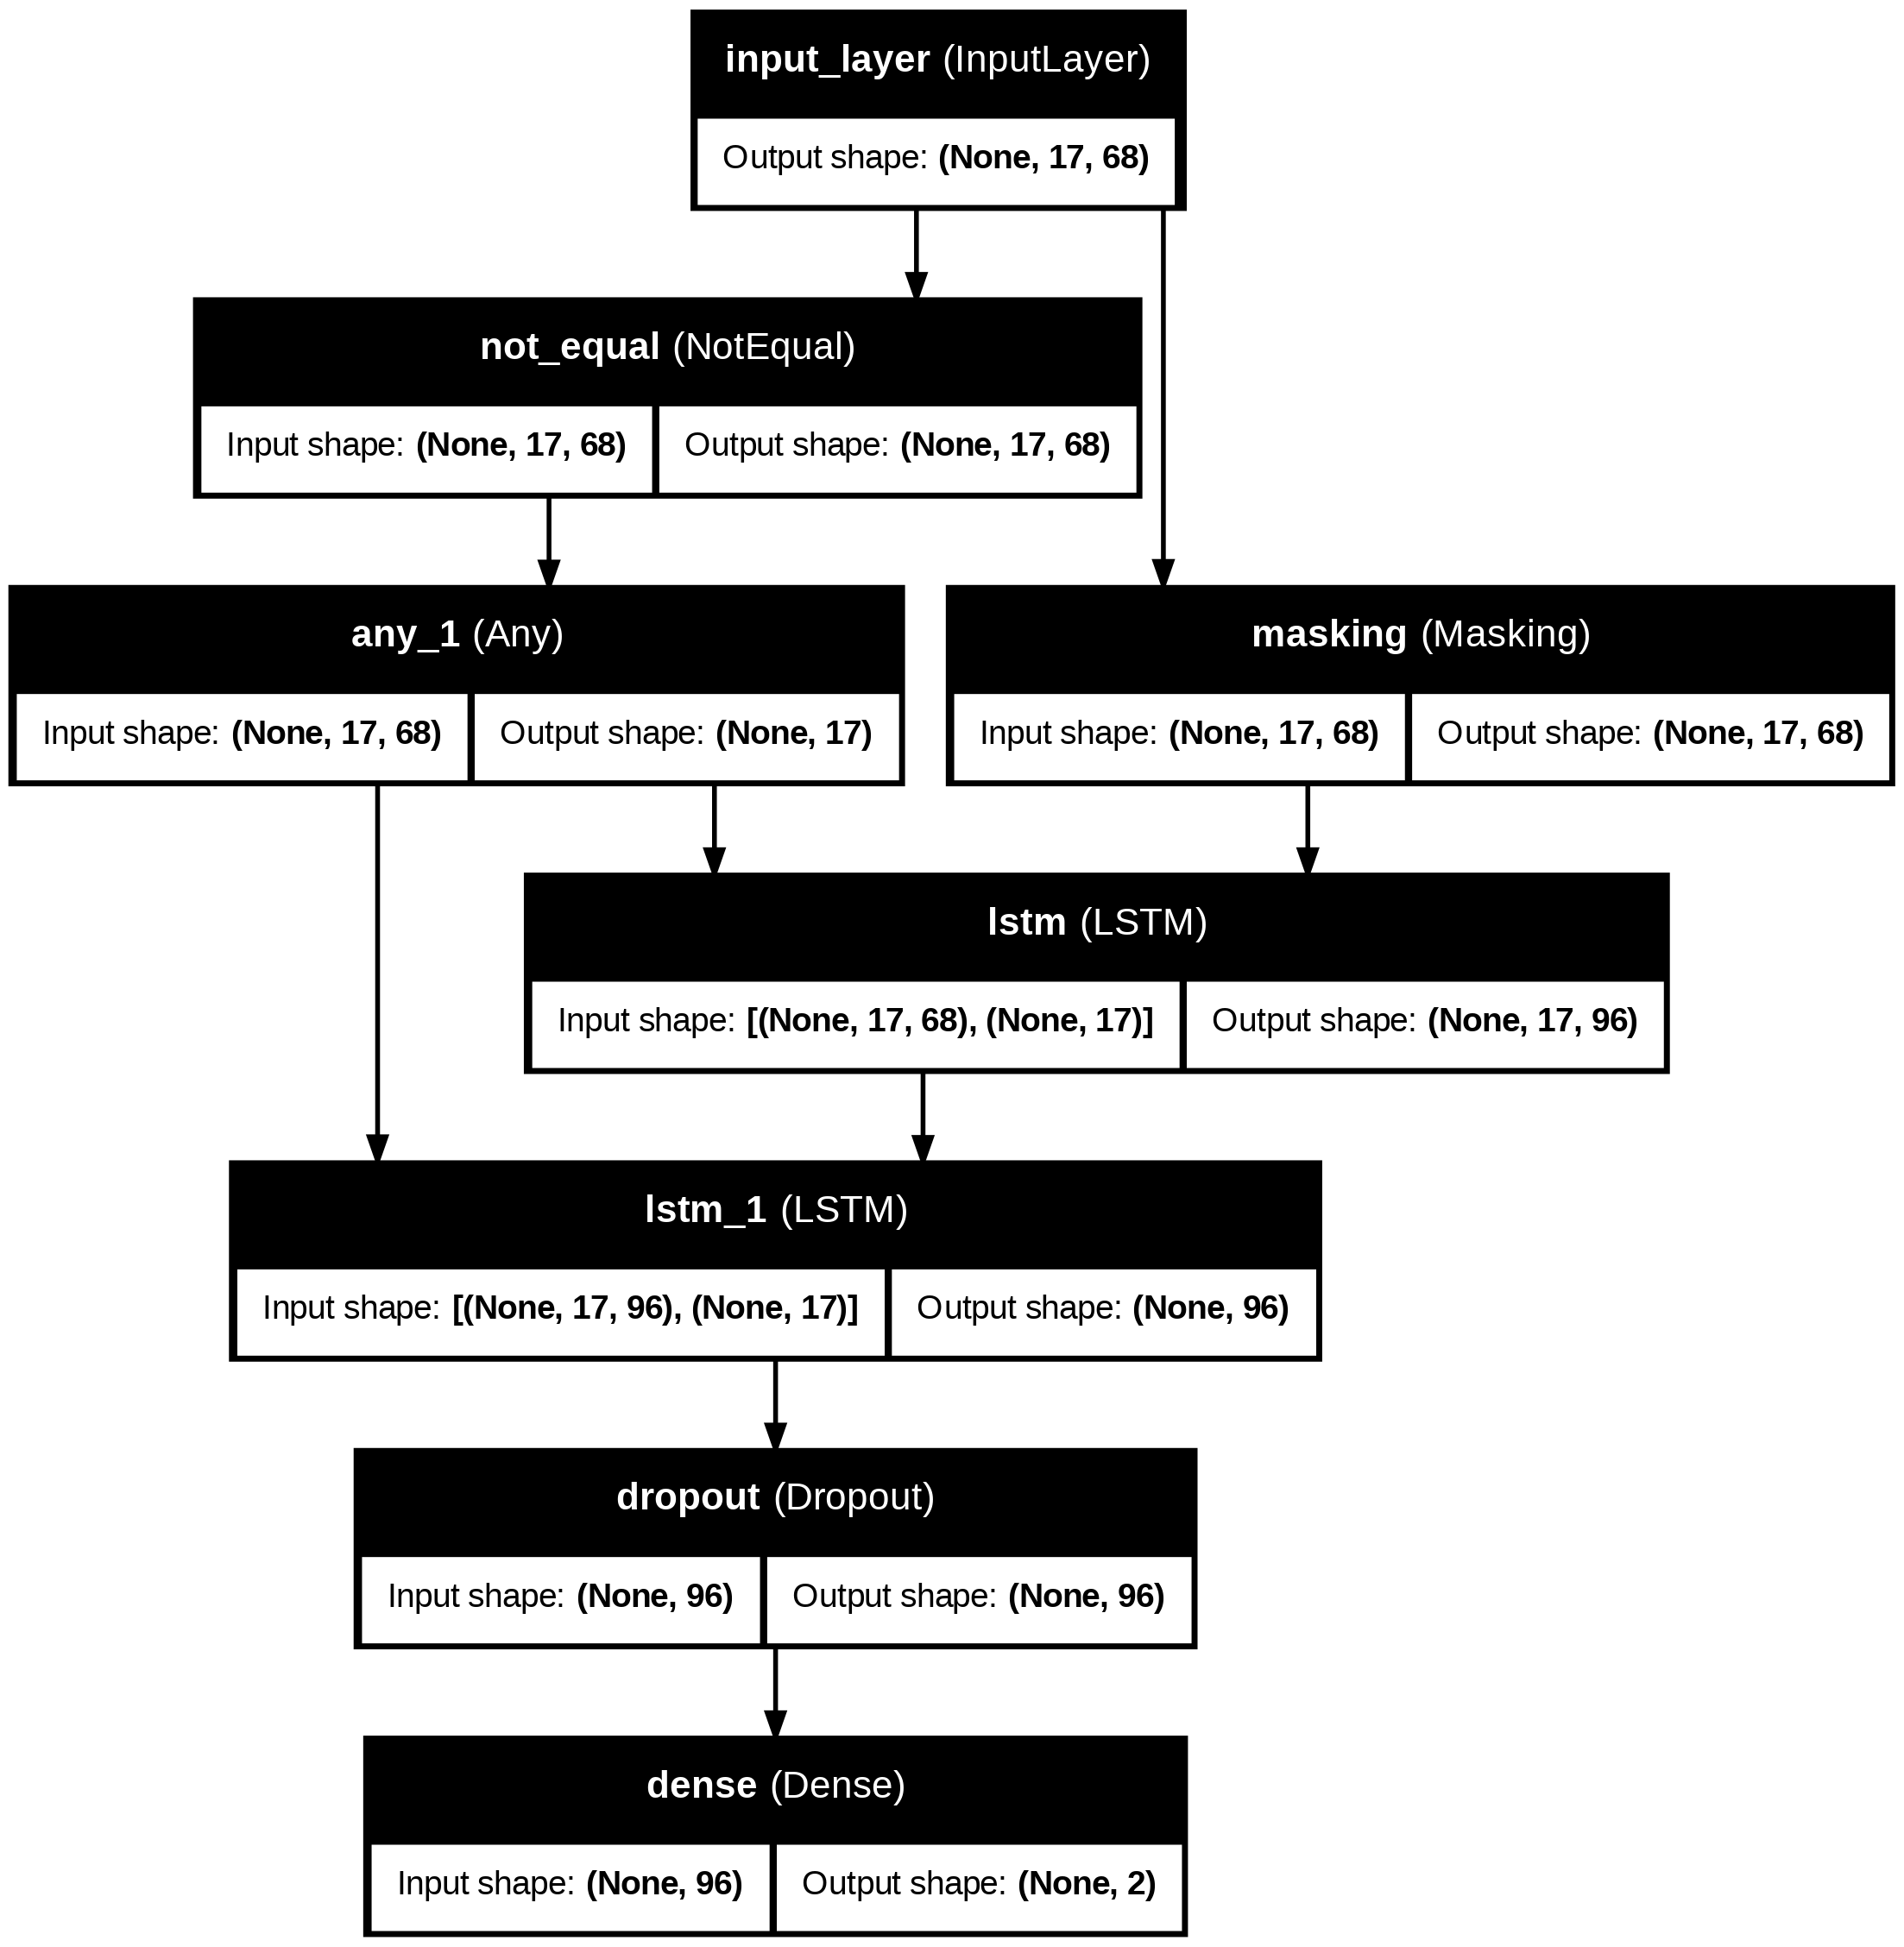

In [ ]:
#read model from keras file
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
model = load_model('fullymodified_data_model_84.keras')
from tensorflow.keras.utils import plot_model
#just print model layers
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)





In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 17, 68)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 17, 68)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ masking (Masking)         │ (None, 17, 68)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ any_1 (Any)               │ (None, 17)             │              0 │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 17, 96)         │         63,360 │ masking[0][0],         │
│                           │                        │                │ any_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 96)             │         74,112 │ lstm[0][0],            │
│                           │                        │                │ any_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 96)             │              0 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 2)              │            194 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 275,334 (1.05 MB)

 Trainable params: 137,666 (537.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 137,668 (537.77 KB)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get all trials
trials = tuner.oracle.trials

# Extract trial data
data = []
for trial_id, trial in trials.items():
    trial_params = trial.hyperparameters.values
    print(trial_params)
    trial_params['trial_id'] = trial_id
    data.append(trial_params)

# Convert to DataFrame
df = pd.DataFrame(data)

!pip install ace-tools-open
import ace_tools_open as tools

tools.display_dataframe_to_user(name="Keras Tuner Trial Results", dataframe=df)


{'lstm_units': 736, 'dropout_rate': 0.4, 'learning_rate': 0.007684964586710821, 'num_lstm_layers': 20, 'use_batch_norm': False, 'regularizer': 'l1', 'trial_id': '04', 'val_accuracy': 0.9411764740943909, 'val_loss': 0.6917394995689392}
{'lstm_units': 992, 'dropout_rate': 0.5, 'learning_rate': 0.004061956964369661, 'num_lstm_layers': 1, 'use_batch_norm': True, 'regularizer': 'l2', 'trial_id': '00', 'val_accuracy': 0.8088235259056091, 'val_loss': 0.3955700099468231}
{'lstm_units': 128, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.00692839655503557, 'num_lstm_layers': 15, 'use_batch_norm': False, 'regularizer': 'l2', 'trial_id': '02', 'val_accuracy': 0.9411764740943909, 'val_loss': 0.6381989121437073}
{'lstm_units': 928, 'dropout_rate': 0.4, 'learning_rate': 0.00012777420505385398, 'num_lstm_layers': 15, 'use_batch_norm': False, 'regularizer': 'l1', 'trial_id': '01', 'val_accuracy': 0.6911764740943909, 'val_loss': 0.9986405372619629}
{'lstm_units': 864, 'dropout_rate': 0.2, 'lea

The type for this graph, int64


<ipython-input-19-7085929cccfc>:13: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[param].dtype == np.number or df[param].dtype == np.int64:


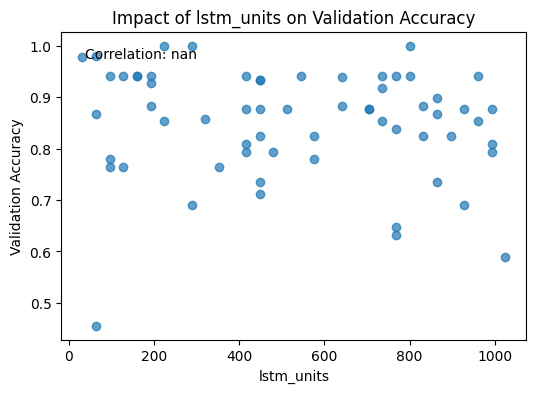

The type for this graph, float64


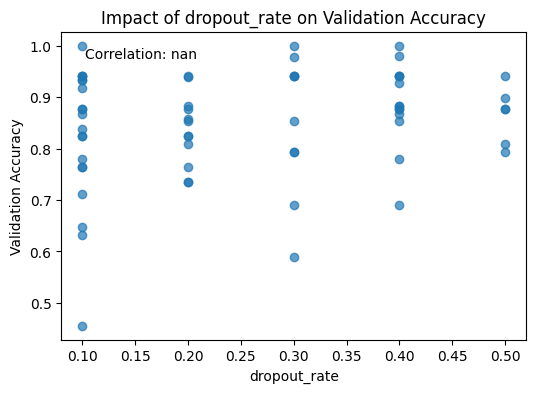

The type for this graph, float64


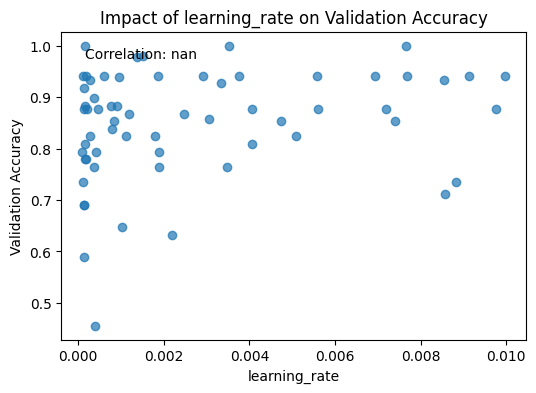

The type for this graph, int64


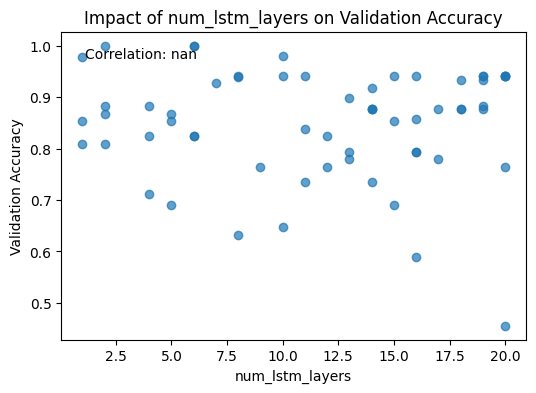

The type for this graph, bool


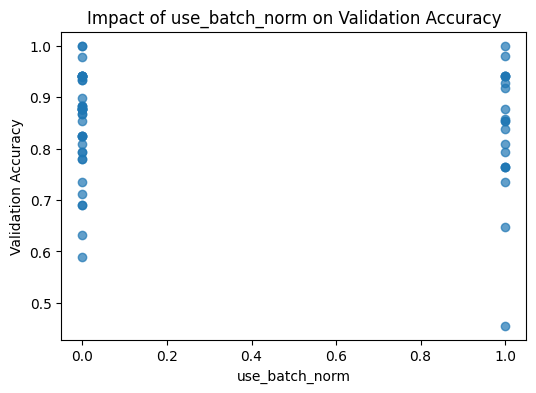

The type for this graph, object


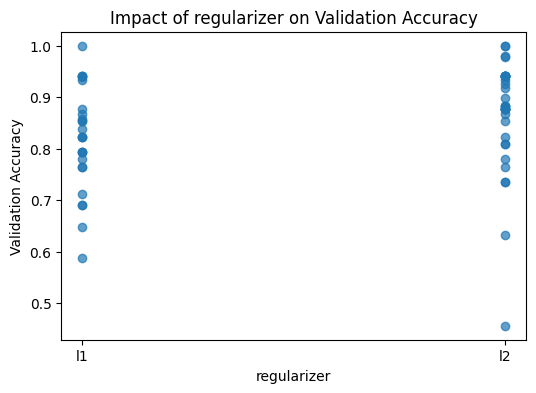

The type for this graph, float64


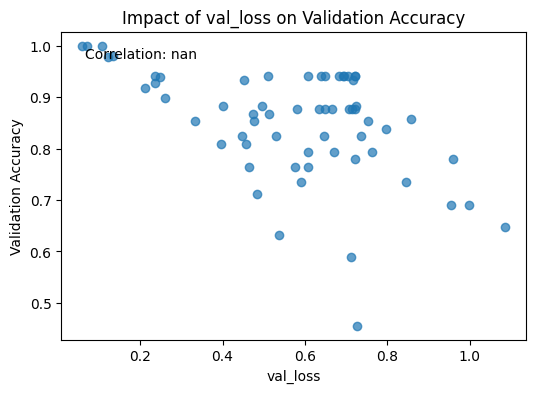

In [ ]:
# Select hyperparameters to visualize
hyperparams = [col for col in df.columns if col not in ['trial_id', 'val_accuracy']]

# Create scatter plots
for param in hyperparams:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[param], df['val_accuracy'], alpha=0.7)
    plt.xlabel(param)
    plt.ylabel('Validation Accuracy')
    plt.title(f'Impact of {param} on Validation Accuracy')
    # Create Correlation coefficient
    print("The type for this graph," ,df[param].dtype)
    if df[param].dtype == np.number or df[param].dtype == np.int64:
      correlation_matrix=  np.corrcoef(df[param], df['val_accuracy'])
      correlation_coefficient = correlation_matrix[0, 1]
      plt.text(0.05, 0.95, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.show()


In [ ]:
# Compute correlation matrix
# Before: corr_matrix = df.corr()
corr_matrix = df.select_dtypes(include=np.number).corr()  # Select numeric columns
df.head()
# Display correlation matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Hyperparameters and Validation Accuracy")
plt.show()